# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Greedy algorithm and dynamic programming



# What is a greedy algorithm?
<hr style="border:2px solid black"> </hr>


- Greedy method is a method that solves as big a piece of the problem as possible **right away**.
- A greedy algorithm is any algorithm that follows the problem-solving heuristic of making the locally optimal choice at **each stage**.
- In many problems, a greedy strategy does not produce an optimal solution, but a greedy heuristic can yield locally optimal solutions that approximate a globally optimal solution in a **reasonable amount of time**. 



# What is dynamic programming?
<hr style="border:2px solid black"> </hr>


- Dynamic Programming is a powerful technique that allows one to solve many different types of problems in time O(n2) or O(n3) for which a naive approach would take **exponential time**.



# Problem
<hr style="border:2px solid black"> </hr>


- Changing money is an optimisation problem involves making change using the fewest coins. e.g. 
- The answer for making a change for 63 cents will be 6 coins: two quarters, one dime, and three pennies. 



In [9]:
def change_money_greedy(amount, coin_values):
    """
    using greedy algorithm to solve the minimum
    number of coins needed to make change for the input
    amount (an integer), given the all the possible coin values.
    The coin values has to be sorted in
    decreasing order for this code to work properly
    """
    
    print("Given coins list: ", coin_values)
    coin_values = list(sorted(coin_values))[::-1]
    print("Sorted (high0>low) coins list: ", coin_values)
    
    # key = coin_values
    # value = corresponding number of that coin value
    change = {}   
    for d in coin_values:
        n_coins = amount // d
        change[d] = n_coins
        amount = amount % d
        if not amount:
            break
    
    return change

In [11]:
amount = 63
coin_values = [10, 25, 5, 1]
change = change_money_greedy(amount, coin_values)
print(change)

Given coins list:  [10, 25, 5, 1]
Sorted (high0>low) coins list:  [25, 10, 5, 1]
{25: 2, 10: 1, 5: 0, 1: 3}


# Where does it fail?
<hr style="border:2px solid black"> </hr>


- Suppose we have an **immaginary 21-cent coin** which we add to our list. 
- In this instance our greedy method fails to find the optimal solution for 63 cents in change. 
- With the addition of the 21 cent coin the greedy method would still find the solution to be 6 coins when the optimal answer should be **3 21** cent pieces.



In [12]:
amount = 63
coin_values = [10, 25, 5, 1, 21]
change = change_money_greedy(amount, coin_values)
print(change)

Given coins list:  [10, 25, 5, 1, 21]
Sorted (high0>low) coins list:  [25, 21, 10, 5, 1]
{25: 2, 21: 0, 10: 1, 5: 0, 1: 3}


# Dynamic programming
<hr style="border:2px solid black"> </hr>


-  Let’s look at a method called dynamic programming, where we could be sure that we would find the **optimal answer** to the problem. Dynamic programming solution is going to start with making change for one cent and systematically work its way up to the amount of change we require.

This guarantees us that at each step of the algorithm we already know the minimum number of coins needed to make change for any smaller amount.

Let’s look at how we would fill in a table of minimum coins to use in making change for 11 cents. The following figure illustrates the process. 

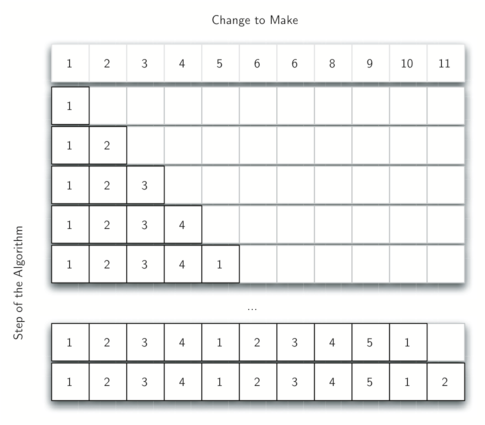

We start with one cent. The only solution possible up till this point is one coin (a penny). The next row shows the minimum for one cent and two cents. Again, the only solution is two pennies. The fifth row is where things get interesting. Now we have two options to consider, five pennies or one nickel. How do we decide which is best? We consult the table and see that the number of coins needed to make change for four cents is four, plus one more penny to make five, equals five coins. Or we can look at zero cents plus one more nickel to make five cents equals 1 coin. Since the minimum of one and five is one we store 1 in the table. Fast forward again to the end of the table and consider 11 cents. The three options that we have to consider:

- A penny plus the minimum number of coins to make change for 11−1=10 cents (1)
- A nickel plus the minimum number of coins to make change for 11−5=6 cents (2)
- A dime plus the minimum number of coins to make change for 11−10=1 cent (1)

Either option 1 or 3 will give us a total of two coins which is the minimum number of coins for 11 cents.



In [16]:
import numpy as np
from collections import defaultdict

def change_money_dp(amount, coin_values):
    """
    using dynamic programming to solve
    the minimum number of coins needed to make change for the 
    input amount (an integer), given the all the possible coin values.
    unlike the greedy algorithm the coin values doesn't need to be sorted in
    decreasing order for this code to work properly
    """
    
    # index starts at 0 (change 0 essentially means nothing
    min_coin  = np.zeros(amount + 1, dtype = np.int)
    used_coin = np.zeros(amount + 1, dtype = np.int)

    for cents in range(amount + 1):
        # all the coins that are smaller than the 
        # current change are all candidates for exchanging
        possible_choices = [c for c in coin_values if c <= cents]

        # store the minimum change number 1, and
        # the maximum number of coins required to
        # make change for the current `cents`,
        # these will later be compared and updated
        coin = 1
        coin_count = cents

        # consider using all possible coins to make 
        # change for the amount specified by cents,
        # and store the minimum number to min_coins
        for j in possible_choices:

            # access the minimum coin required to make 
            # cents - j amount and add 1 to account for
            # the fact that you're using the current coin
            # to give the changes
            min_coin_count = min_coin[cents - j] + 1
            if min_coin_count < coin_count:
                coin_count = min_coin_count
                coin = j

        min_coin[cents] = coin_count
        used_coin[cents] = coin
    
    # determine the number of each coins used to
    # make the change
    change = defaultdict(int)
    coin = amount
    while coin > 0:
        coin_current = used_coin[coin]
        coin -= coin_current
        change[coin_current] += 1
        
    return change

In [17]:
amount = 63
coin_values = [21, 10, 35, 5, 1]
change = change_money_dp(amount, coin_values)
print(change)

defaultdict(<class 'int'>, {21: 3})


# References
<hr style="border:2px solid black"> </hr>


- https://github.com/ethen8181/machine-learning/blob/master/python/algorithms/recursion.ipynb
- https://en.wikipedia.org/wiki/Greedy_algorithm
- https://en.wikipedia.org/wiki/Dynamic_programming

